In [ ]:
#TODO Dataset description. WHat does each feature mean?

  Company (Maker-if known) Specific Bean Origin or Bar Name   REF  \
0                 A. Morin                      Agua Grande  1876   
1                 A. Morin                            Kpime  1676   
2                 A. Morin                           Atsane  1676   
3                 A. Morin                            Akata  1680   
4                 A. Morin                           Quilla  1704   

   Review Date Cocoa Percent Company Location  Rating Bean Type  \
0         2016           63%           France    3.75             
1         2015           70%           France    2.75             
2         2015           70%           France    3.00             
3         2015           70%           France    3.50             
4         2015           70%           France    3.50             

  Broad Bean Origin  
0          Sao Tome  
1              Togo  
2              Togo  
3              Togo  
4              Peru  


C:\Users\Keshf\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Keshf\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Keshf\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


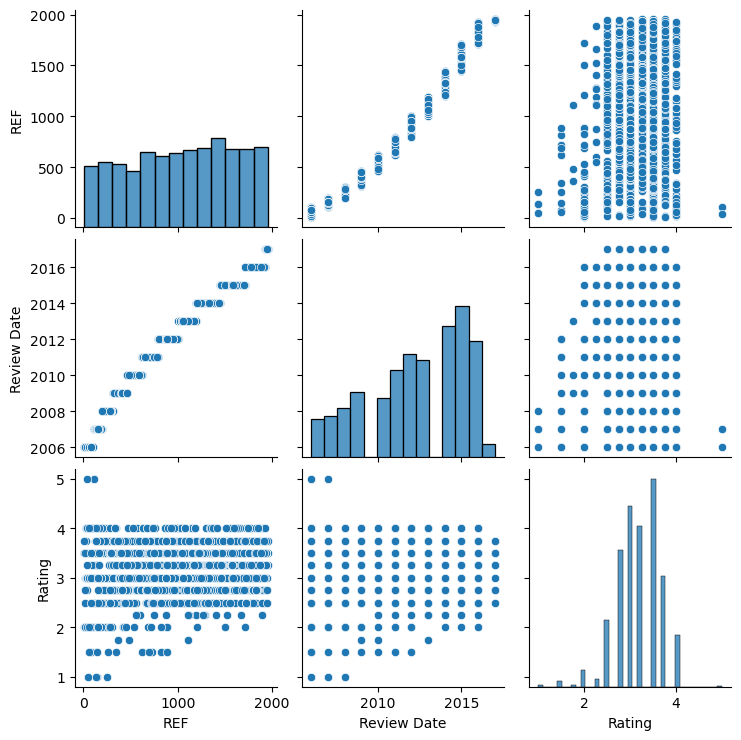

In [27]:
import pandas as pd
import seaborn as sns

#import dataset
df = pd.read_csv('flavors_of_cacao_mod.csv')
print(df.head())

#pair plot graphs
sns.pairplot(df)
#Make correlation matrix graph and other graphs for EDA
#TODO





In [ ]:
#Note down correlation observations from the correlation matrix. Include anything else that may be interesting
#TODO

In [ ]:
#